<a href="https://colab.research.google.com/github/nav0203/Time-Series-Forecasting-Project/blob/main/Time_Series_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecasting Project**



#**TSF Project Shoe Sales**

In [ ]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Store the csv file path in a variable
path = "/content/drive/My Drive/Shoe-Sales.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91
...,...,...
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220


In [ ]:
#printing the data frame
print(df)

    YearMonth  Shoe_Sales
0     1980-01          85
1     1980-02          89
2     1980-03         109
3     1980-04          95
4     1980-05          91
..        ...         ...
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

[187 rows x 2 columns]


## **Read the data as an appropriate Time Series data and plot the data.**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

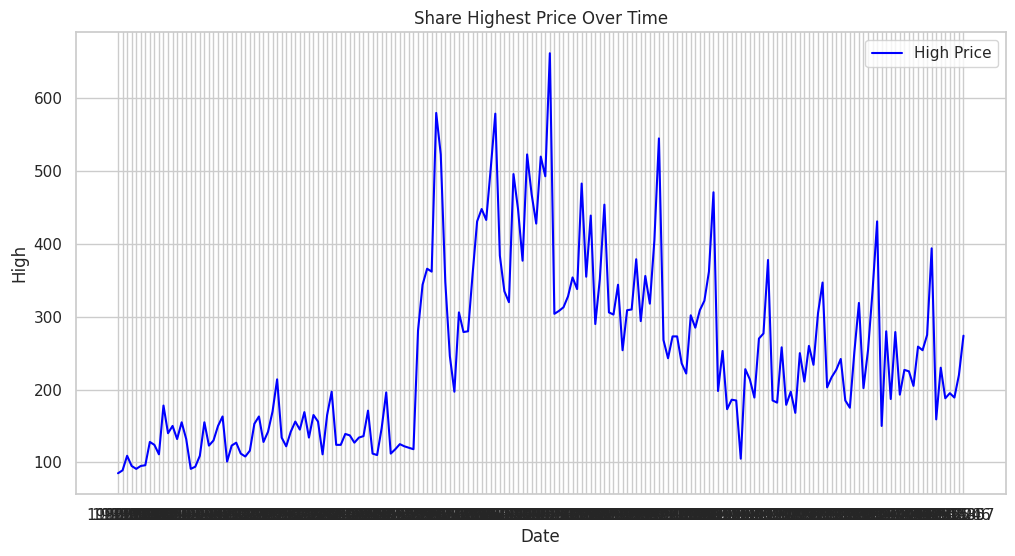

In [ ]:

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='YearMonth', y='Shoe_Sales', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

In [ ]:
df

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91
...,...,...
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220


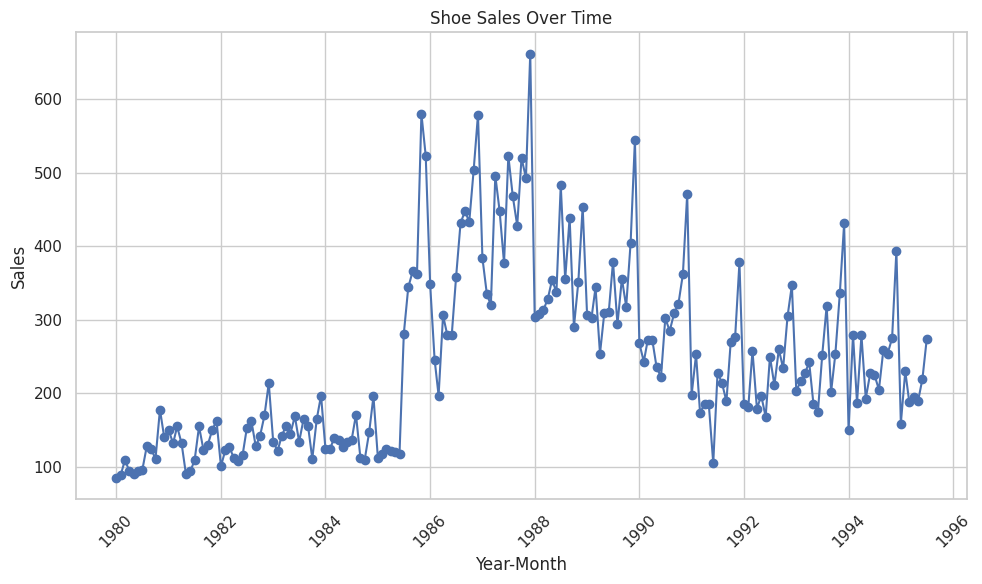

In [ ]:
# Convert 'YearMonth' to datetime format
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

# Set 'YearMonth' as index
df.set_index('YearMonth', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Shoe_Sales'], marker='o', linestyle='-')
plt.title('Shoe Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

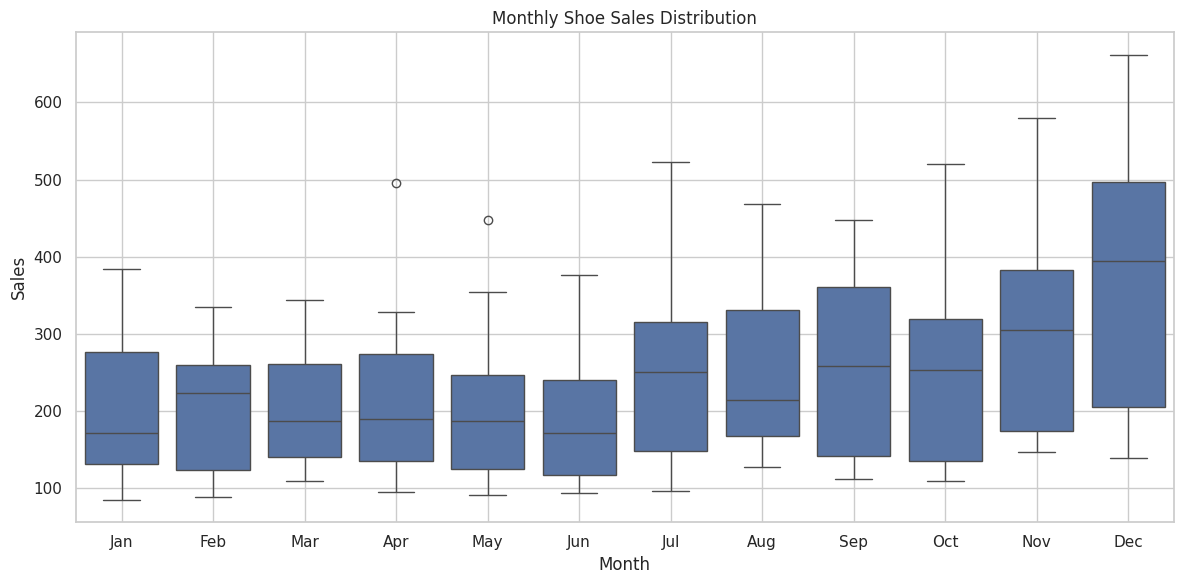

In [ ]:
# Plotting the monthly shoe sales distribution
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Shoe_Sales', data=df)
plt.title('Monthly Shoe Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

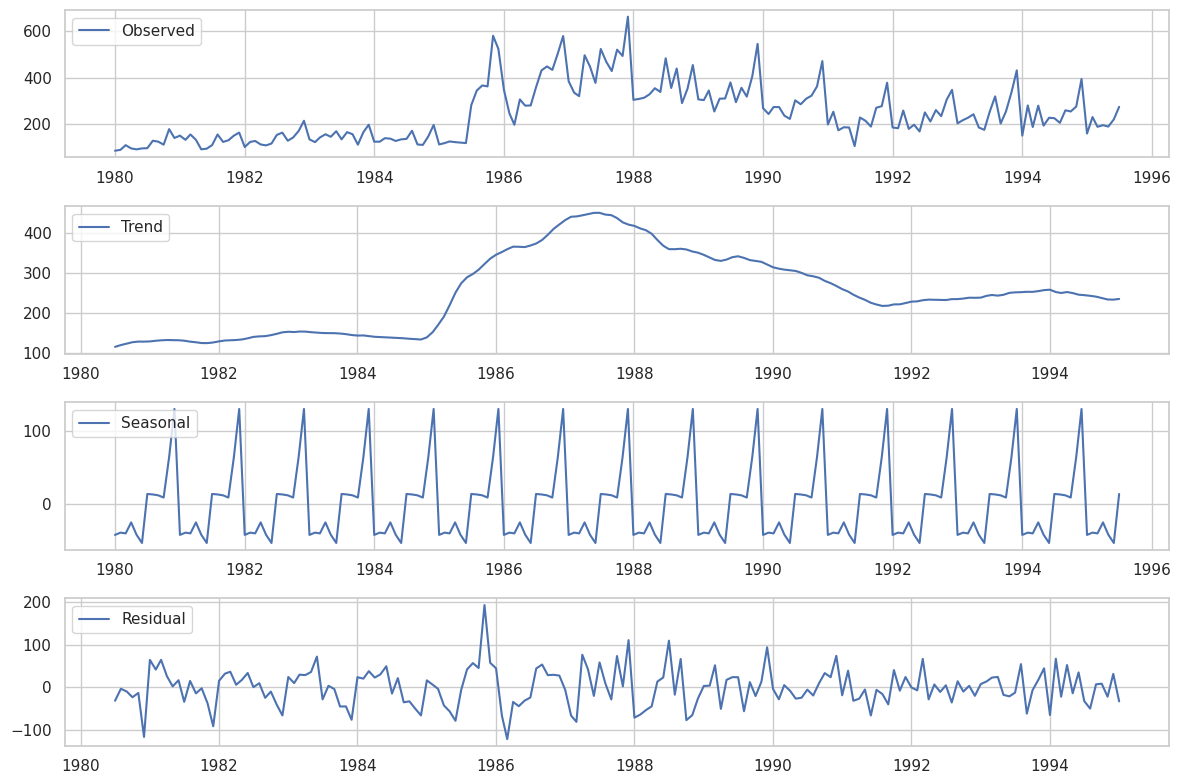

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
 #Perform decomposition
result = seasonal_decompose(df['Shoe_Sales'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

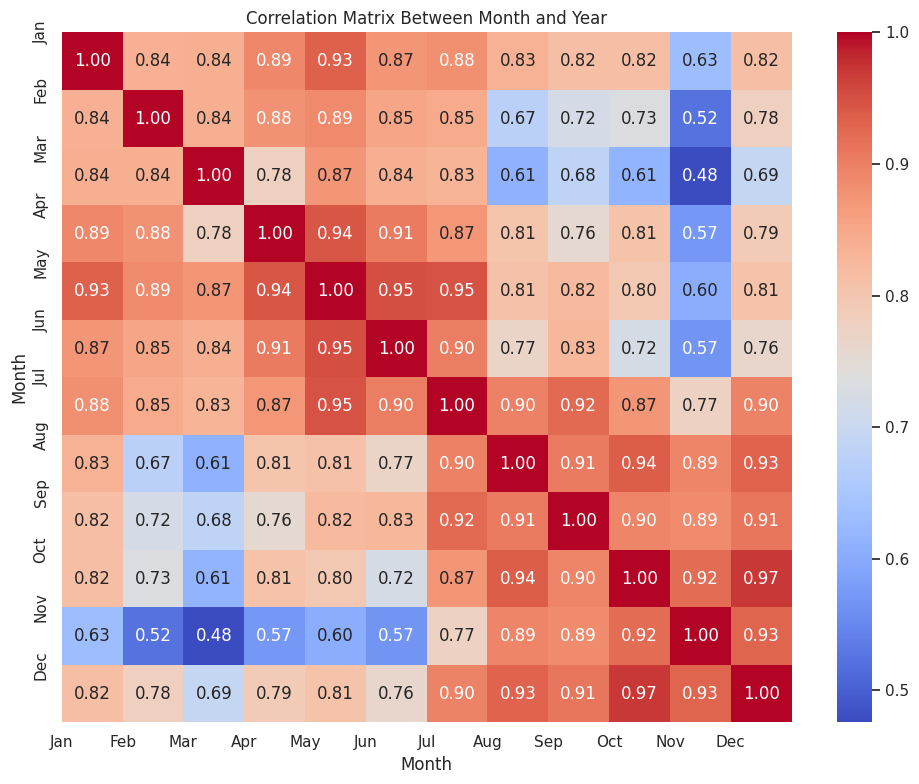

In [ ]:
#Correlation Matrix Between Month and Year
# Pivot the DataFrame to have months as columns and years as rows
pivot_df = df.pivot_table(index='Year', columns='Month', values='Shoe_Sales', aggfunc='sum')

# Calculate the correlation matrix
corr_matrix = pivot_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Month and Year')
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

## **Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

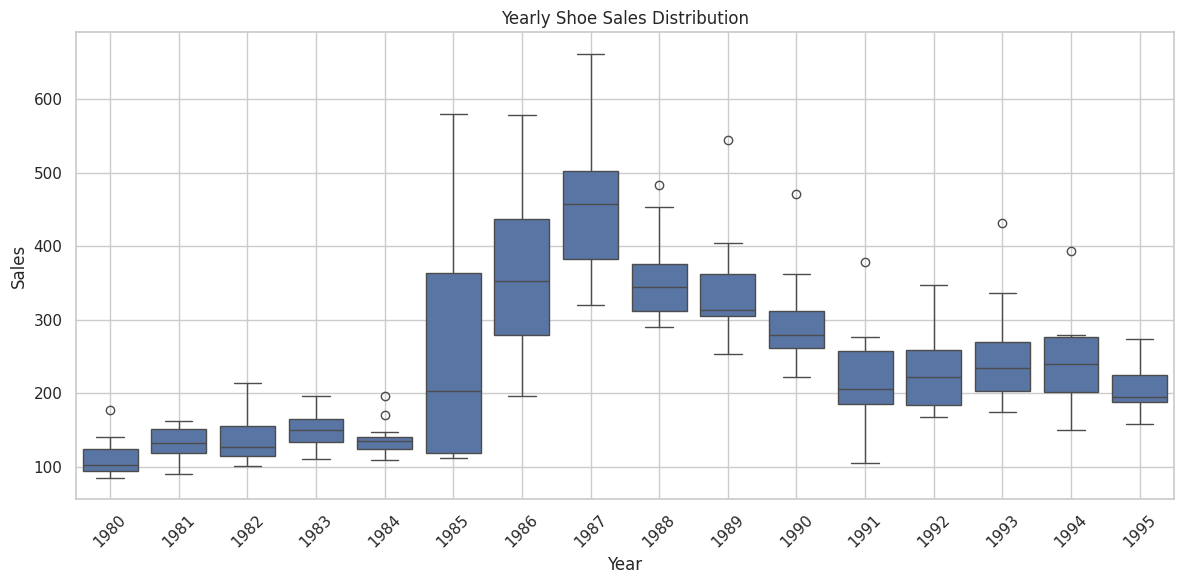

In [ ]:
#Yearly Shoe Sales Distribution
# Extract year from the index
df['Year'] = df.index.year

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Shoe_Sales', data=df)
plt.title('Yearly Shoe Sales Distribution')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

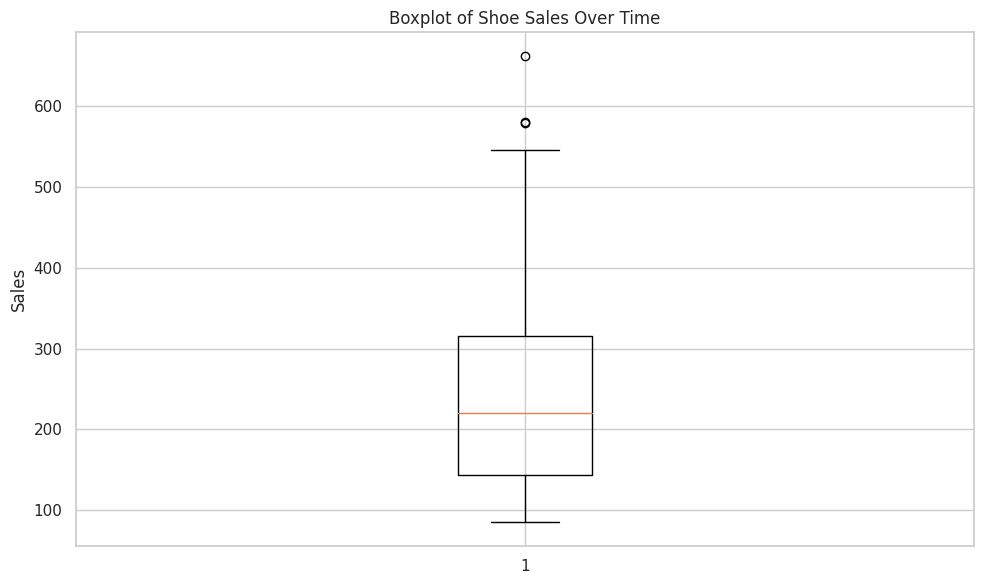

In [ ]:
#Boxplot of Shoe Sales Over Time

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Shoe_Sales'])
plt.title('Boxplot of Shoe Sales Over Time')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

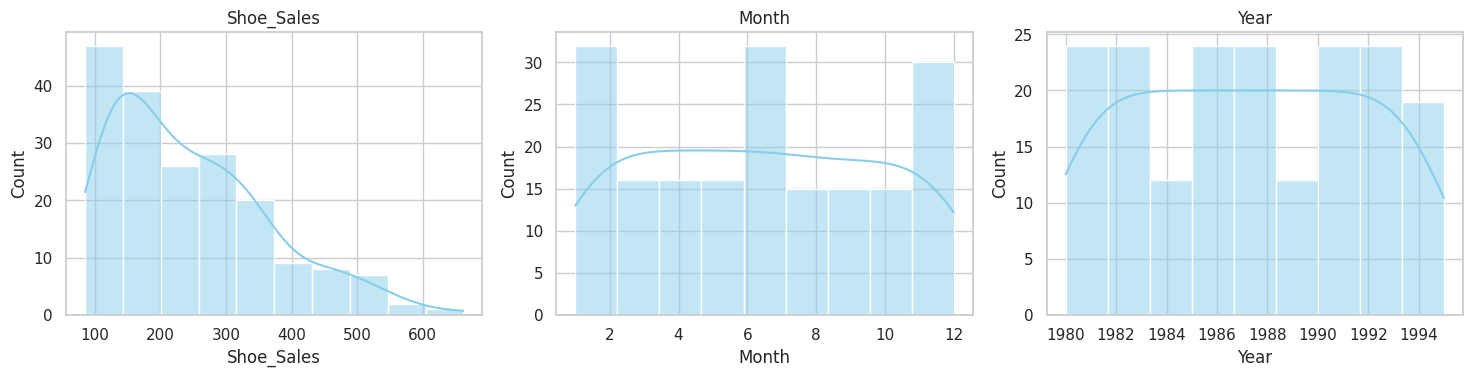

In [ ]:
## Creating histograms of all the columns to capture the distribution of each variable
plt.figure(figsize=(15, 14))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], color='skyblue', kde = True)
    plt.title(col)
plt.tight_layout();

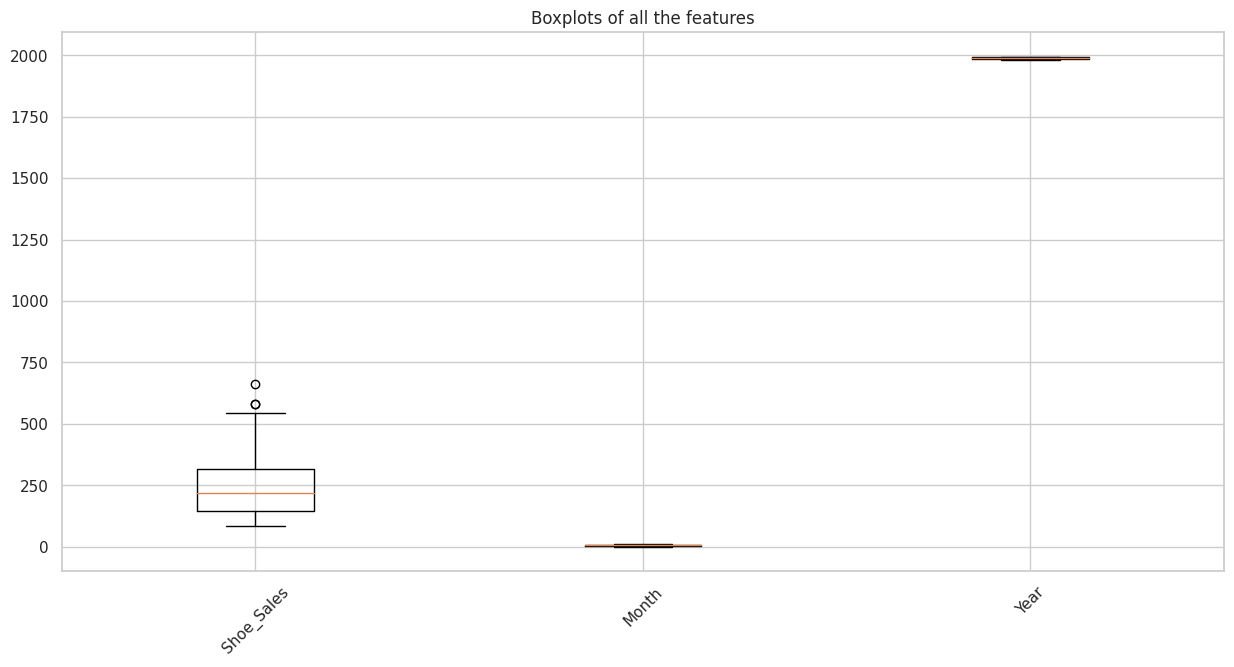

In [ ]:
## Boxplots of individual variables
plt.figure(figsize = (15,7))
plt.boxplot(df.values, labels = df.columns)
plt.title('Boxplots of all the features')
plt.xticks(rotation=45);

In [ ]:
df

,Shoe_Sales,Month,Year
YearMonth,,,
1980-01-01,85,1,1980
1980-02-01,89,2,1980
1980-03-01,109,3,1980
1980-04-01,95,4,1980
1980-05-01,91,5,1980
...,...,...,...
1995-03-01,188,3,1995
1995-04-01,195,4,1995
1995-05-01,189,5,1995


In [ ]:
df.drop(columns=['Month','Year'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Shoe_Sales,187.0,245.636364,121.390804,85.0,143.5,220.0,315.5,662.0


In [ ]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

In [ ]:
df.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [ ]:
df.tail()

,Shoe_Sales
YearMonth,
1995-03-01,188
1995-04-01,195
1995-05-01,189
1995-06-01,220
1995-07-01,274


In [ ]:
df.corr()

,Shoe_Sales
Shoe_Sales,1.0


In [ ]:
df.columns

Index(['Shoe_Sales'], dtype='object')

In [ ]:
df.dtypes

Shoe_Sales    int64
dtype: object

In [ ]:
df.shape

(187, 1)

In [ ]:
df.duplicated()

YearMonth
1980-01-01    False
1980-02-01    False
1980-03-01    False
1980-04-01    False
1980-05-01    False
              ...  
1995-03-01    False
1995-04-01    False
1995-05-01     True
1995-06-01    False
1995-07-01    False
Length: 187, dtype: bool

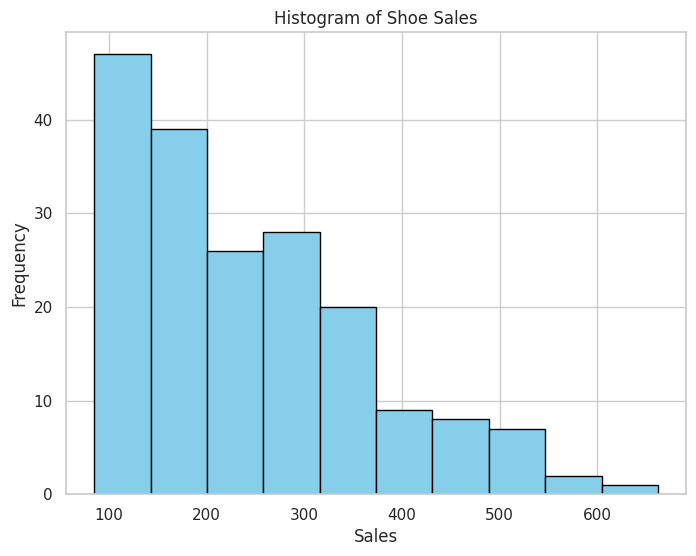

In [ ]:
#Histogram of Shoe Sales
plt.figure(figsize=(8, 6))
plt.hist(df, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Shoe Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


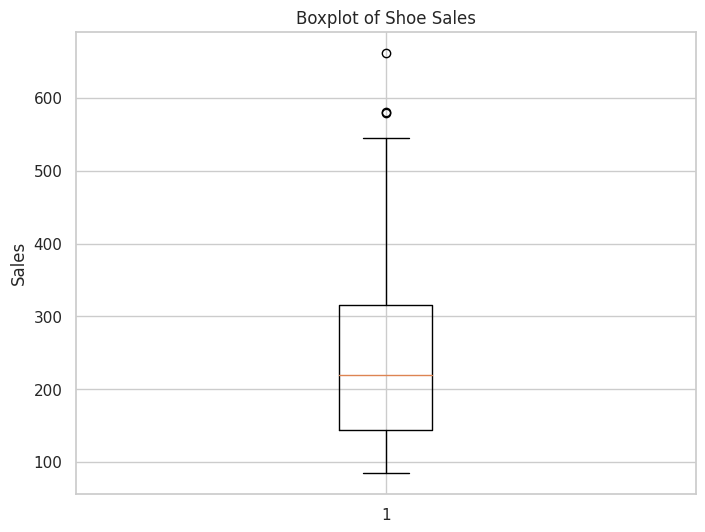

In [ ]:
#Boxplot of Shoe Sales
plt.figure(figsize=(8, 6))
plt.boxplot(df)
plt.title('Boxplot of Shoe Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


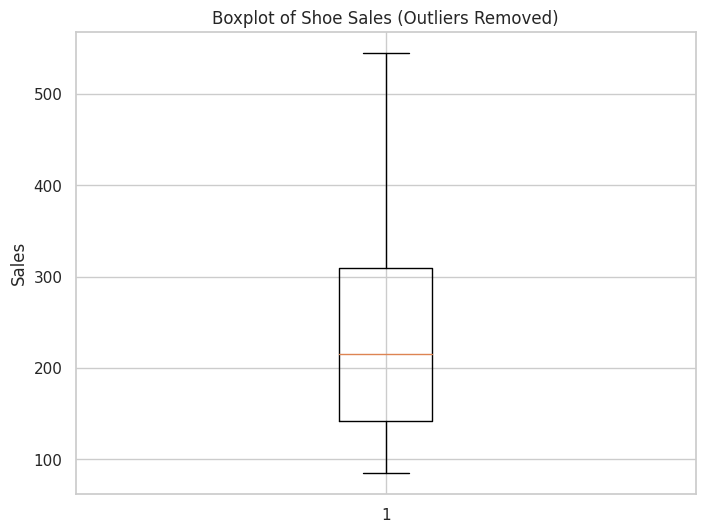

In [ ]:
#Removal of Outliers in Shoe sales column
Q1 = df['Shoe_Sales'].quantile(0.25)
Q3 = df['Shoe_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['Shoe_Sales'] >= lower_bound) & (df['Shoe_Sales'] <= upper_bound)]

# Create boxplot without outliers using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['Shoe_Sales'])
plt.title('Boxplot of Shoe Sales (Outliers Removed)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

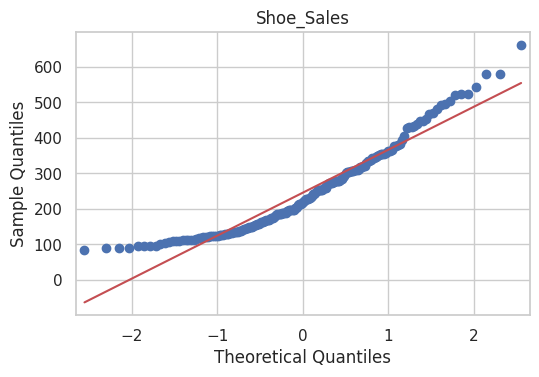

In [ ]:
## Q-Q plots
from statsmodels.api import qqplot
plt.figure(figsize=(15, 14))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    qqplot(df[col], line='s',ax=plt.gca())
    plt.title(col)
plt.tight_layout();

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Shoe_Sales
Shoe_Sales,1.0


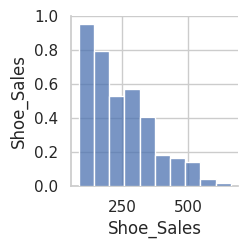

In [ ]:
sns.pairplot(df[['Shoe_Sales']])

Split the data into training and test. The test data should start in 1991.

In [ ]:
df

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91
...,...
1995-03-01,188
1995-04-01,195
1995-05-01,189


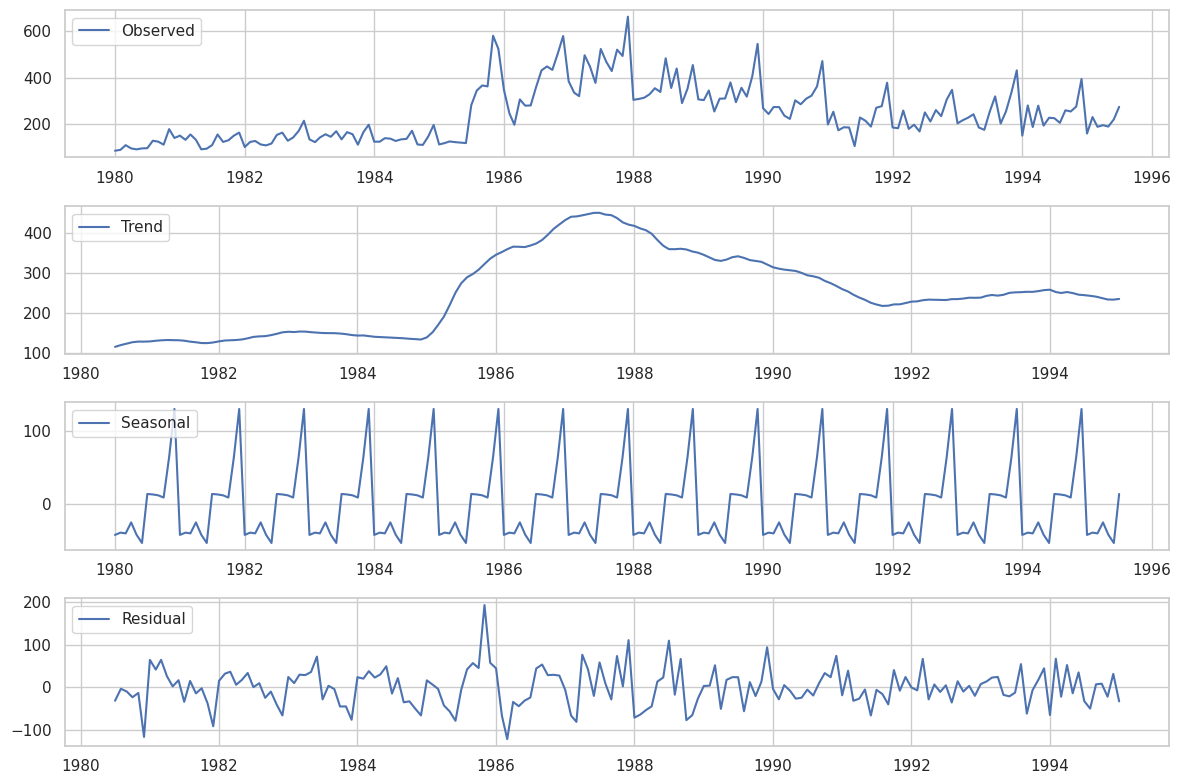

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
 #Perform decomposition
result = seasonal_decompose(df['Shoe_Sales'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## **Split the data into training and test. The test data should start in 1991.**

In [ ]:
# Split data into training and test sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

print("Training data:")
print(train)
print("\nTest data:")
print(test)

Training data:
            Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
...                ...
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

[132 rows x 1 columns]

Test data:
            Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185
1991-06-01         105
1991-07-01         228
1991-08-01         214
1991-09-01         189
1991-10-01         270
1991-11-01         277
1991-12-01         378
1992-01-01         185
1992-02-01         182
1992-03-01         258
1992-04-01         179
1992-05-01         197
1992-06-01         168
1992-07-01         250
1992-08-01         211
1992-09-01         260
1992-10-01         234
1992-11-01         305
1992-12-01         347
1993-01-01         203
1993-02-01         217
1993-0

## **Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.Other models such as regression, naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extract the values from the 'Shoe_Sales' column for both training and test data
train_values = train['Shoe_Sales'].values
test_values = test['Shoe_Sales'].values

# Run Dickey-Fuller test on training data
result_train = adfuller(train_values)

# Print test statistic and p-value for training data
print('ADF Statistic for training data:', result_train[0])
print('p-value for training data:', result_train[1])

ADF Statistic for training data: -1.3611289140040939
p-value for training data: 0.6007631202277175


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Convert train_values to a pandas Series
train_series = pd.Series(train_values)

# Run Dickey-Fuller test
result = adfuller(train_series.diff().dropna())

# Print test statistic
print('ADF Statistic:', result[0])

# Print p-value
print('p-value:', result[1])


ADF Statistic: -3.1442107221911852
p-value: 0.02344974109466499


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run Dicky-Fuller test
result = adfuller(train)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])

The test stastics: -1.3611289140040939
The p-value: 0.6007631202277175


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Exponential smoothing models
# Simple Exponential Smoothing
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
model_ses = ExponentialSmoothing(train, trend=None, seasonal=None).fit()
# Holt's Exponential Smoothing
model_holt = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
# Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

In [ ]:
# Other forecast models
# Regression
regression_model = LinearRegression()
regression_model.fit(np.arange(len(train)).reshape(-1, 1), train['Shoe_Sales'])
# Naive forecast
naive_forecast = train['Shoe_Sales'].iloc[-1]
# Simple average forecast
simple_average_forecast = train['Shoe_Sales'].mean()


In [ ]:
# Predictions
# Exponential smoothing predictions
ses_predictions = model_ses.forecast(len(test))
holt_predictions = model_holt.forecast(len(test))
hw_predictions = model_hw.forecast(len(test))
# Other model predictions
regression_predictions = regression_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))
naive_forecast_predictions = np.array([naive_forecast] * len(test))
simple_average_predictions = np.array([simple_average_forecast] * len(test))

# Evaluate performance using RMSE
def calculate_rmse(predictions, actual):
    return np.sqrt(mean_squared_error(actual, predictions))

In [ ]:
# RMSE for exponential smoothing models
rmse_ses = calculate_rmse(ses_predictions, test['Shoe_Sales'])
rmse_holt = calculate_rmse(holt_predictions, test['Shoe_Sales'])
rmse_hw = calculate_rmse(hw_predictions, test['Shoe_Sales'])
# RMSE for other forecast models
rmse_regression = calculate_rmse(regression_predictions, test['Shoe_Sales'])
rmse_naive = calculate_rmse(naive_forecast_predictions, test['Shoe_Sales'])
rmse_simple_average = calculate_rmse(simple_average_predictions, test['Shoe_Sales'])

# Print RMSE values
print("RMSE for Exponential Smoothing Models:")
print("Simple Exponential Smoothing:", rmse_ses)
print("Holt's Exponential Smoothing:", rmse_holt)
print("Holt-Winters Exponential Smoothing:", rmse_hw)
print("\nRMSE for Other Forecast Models:")
print("Regression:", rmse_regression)
print("Naive Forecast:", rmse_naive)
print("Simple Average Forecast:", rmse_simple_average)

RMSE for Exponential Smoothing Models:
Simple Exponential Smoothing: 196.40494102498238
Holt's Exponential Smoothing: 266.5684287163948
Holt-Winters Exponential Smoothing: 109.01688439657312

RMSE for Other Forecast Models:
Regression: 266.2764718475469
Naive Forecast: 245.1213057762514
Simple Average Forecast: 63.98456970784353


## **Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. – : Stationarity should be checked at alpha = 0.05.**

To check for the stationarity of the time series data, we can use the Augmented Dickey-Fuller (ADF) test. The null hypothesis of the ADF test is that the time series data is non-stationary, while the alternative hypothesis is that the data is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop missing values before performing the ADF test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result

# Check stationarity of the original data
print("Original Data:")
adf_results = adf_test(df['Shoe_Sales'])

# If the data is found to be non-stationary (p-value > 0.05), take appropriate steps to make it stationary
if adf_results[1] > 0.05:
    # For example, we can compute the first difference to remove trend
    df['Diff_Sales'] = df['Shoe_Sales'].diff().dropna()

    # Check stationarity of the differenced data
    print("\nDifferenced Data:")
    adf_test(df['Diff_Sales'])


Original Data:
ADF Statistic: -1.7173974216499908
p-value: 0.42217182696953526
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705

Differenced Data:
ADF Statistic: -3.479160347868113
p-value: 0.008538710846569314
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop missing values before performing the ADF test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result

# Check stationarity of the differenced data
print("\nDifferenced Data:")
adf_results_diff = adf_test(df['Diff_Sales'])



Differenced Data:
ADF Statistic: -3.479160347868113
p-value: 0.008538710846569314
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705


In [ ]:
# Apply seasonal differencing
df['Seasonal_Diff_Sales'] = df['Shoe_Sales'].diff(12)  # Assuming a seasonal period of 12 months

# Check stationarity of the seasonally differenced data
print("\nSeasonally Differenced Data:")
adf_results_seasonal_diff = adf_test(df['Seasonal_Diff_Sales'])


Seasonally Differenced Data:
ADF Statistic: -2.1221708823811904
p-value: 0.23569352829976353
Critical Values:
	1%: -3.471633386932248
	5%: -2.8796651107461972
	10%: -2.576433647235832


## **Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

In [ ]:
df

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91
...,...
1995-03-01,188
1995-04-01,195
1995-05-01,189


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA # import the ARIMA class
import statsmodels.api as sm

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Explicitly set the frequency to 'MS' (Month Start)
df.index = df.index.to_period('M').to_timestamp()

# Now fit the ARIMA model
for i in range(0, 1):
    for j in range(0, 1):
        for k in range(0, 1):
            model = ARIMA(train['Shoe_Sales'], order=(i, j, k)).fit()
            print(model.aic)


1679.7318645754142


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import itertools

Best ARIMA(0, 0, 0) model AIC: 1679.7318645754142
RMSE: 63.984574259111874


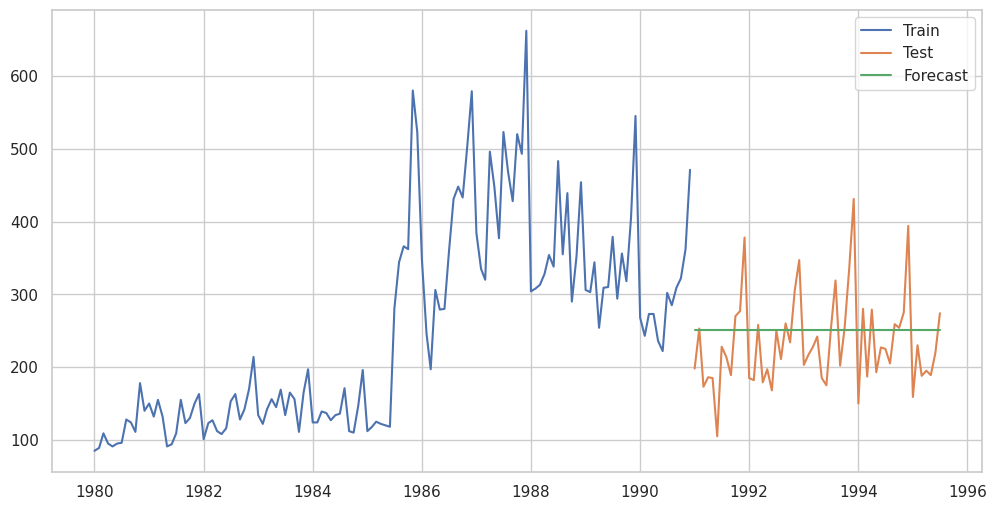

In [ ]:
p = range(0, 1)  # Example range for p
d = range(0, 1)  # Example range for d
q = range(0, 1)  # Example range for q
pdq = list(itertools.product(p, d, q))

# ... (rest of your code)

# Iterate over all combinations of p, d, q
for param in pdq:  # Use pdq here, not ijk
    try:
        model = ARIMA(train['Shoe_Sales'], order=param).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_pdq = param
            best_model = model
    except:
        continue

print(f"Best ARIMA{best_pdq} model AIC: {best_aic}")

# Forecast using the best model
forecast = best_model.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(test['Shoe_Sales'], forecast))
print(f"RMSE: {rmse}")

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Shoe_Sales'], label='Train')
plt.plot(test.index, test['Shoe_Sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

## **Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE. – 9 marks.**


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt
import warnings

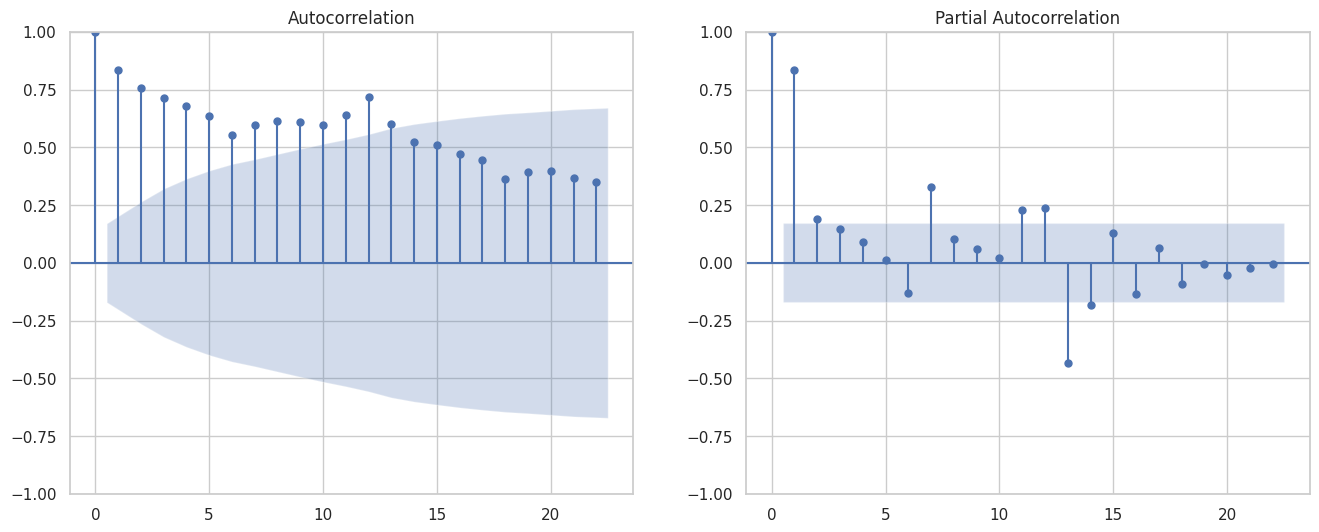

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(train['Shoe_Sales'], ax=axes[0])
plot_pacf(train['Shoe_Sales'], ax=axes[1])
plt.show()

Best ARIMA(0, 0, 0) model AIC: 1679.7318645754142
RMSE: 63.984574259111874


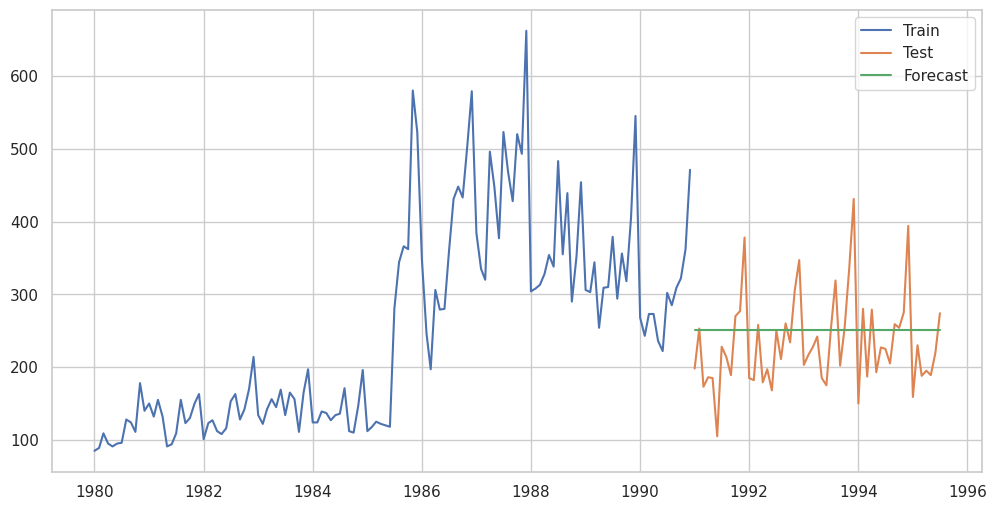

In [ ]:
p = range(0, 1)  # Adjust these based on your ACF and PACF plots
d = range(0, 1)
q = range(0, 1)
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model and lowest AIC
best_aic = np.inf
best_pdq = None
best_model = None

# Iterate over all combinations of p, d, q
for param in pdq:
    try:
        model = ARIMA(train['Shoe_Sales'], order=param).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_pdq = param
            best_model = model
    except:
        continue

print(f"Best ARIMA{best_pdq} model AIC: {best_aic}")

# Forecast using the best model
forecast = best_model.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(test['Shoe_Sales'], forecast))
print(f"RMSE: {rmse}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Shoe_Sales'], label='Train')
plt.plot(test.index, test['Shoe_Sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

## **Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

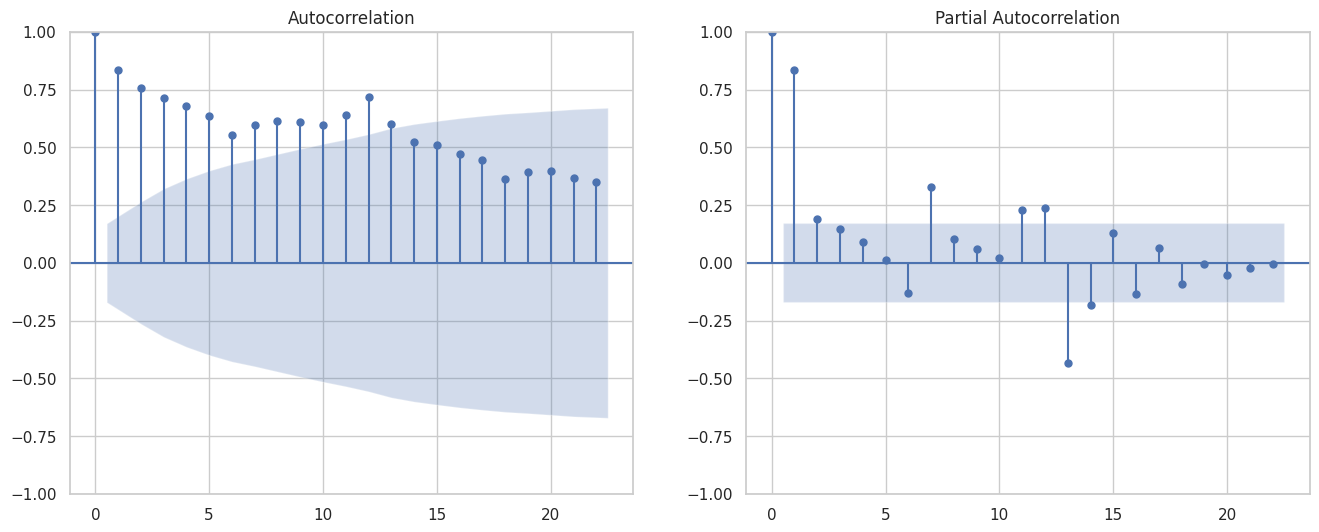

Best ARIMA(0, 0, 0) model AIC: 1679.7318645754142
RMSE: 63.984574259111874


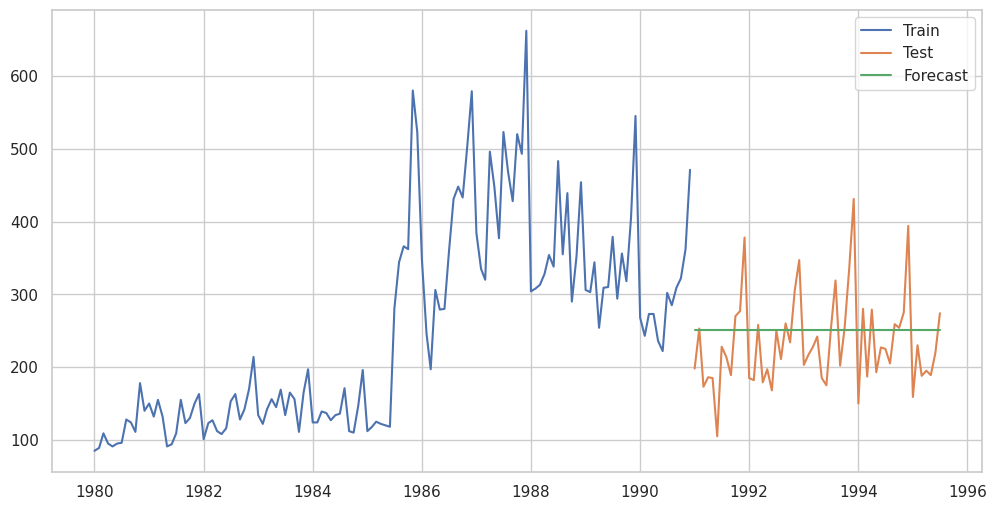

  Parameters          AIC       RMSE
0  (0, 0, 0)  1679.731865  63.984574


In [ ]:

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(train['Shoe_Sales'], ax=axes[0])
plot_pacf(train['Shoe_Sales'], ax=axes[1])
plt.show()

# Define the range of parameters for p, d, q based on ACF and PACF
p = range(0, 1)  # Adjust these based on your ACF and PACF plots
d = range(0, 1)
q = range(0, 1)
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model and lowest AIC
best_aic = np.inf
best_pdq = None
best_model = None

# List to store model details
model_details = []

# Iterate over all combinations of p, d, q
for param in pdq:
    try:
        model = ARIMA(train['Shoe_Sales'], order=param).fit()
        forecast = model.forecast(steps=len(test))
        forecast = pd.Series(forecast, index=test.index)
        rmse = np.sqrt(mean_squared_error(test['Shoe_Sales'], forecast))
        model_details.append((param, model.aic, rmse))
        if model.aic < best_aic:
            best_aic = model.aic
            best_pdq = param
            best_model = model
    except:
        continue

print(f"Best ARIMA{best_pdq} model AIC: {best_aic}")

# Forecast using the best model
forecast = best_model.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(test['Shoe_Sales'], forecast))
print(f"RMSE: {rmse}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Shoe_Sales'], label='Train')
plt.plot(test.index, test['Shoe_Sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Create a DataFrame from model_details
models_df = pd.DataFrame(model_details, columns=['Parameters', 'AIC', 'RMSE'])

# Display the table
print(models_df)

In [ ]:

# Create a DataFrame from model_details
models_df = pd.DataFrame(model_details, columns=['Parameters', 'AIC', 'RMSE'])

# Display the table
print(models_df)

  Parameters          AIC       RMSE
0  (0, 0, 0)  1679.731865  63.984574


## **Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands. – 3 marks.**

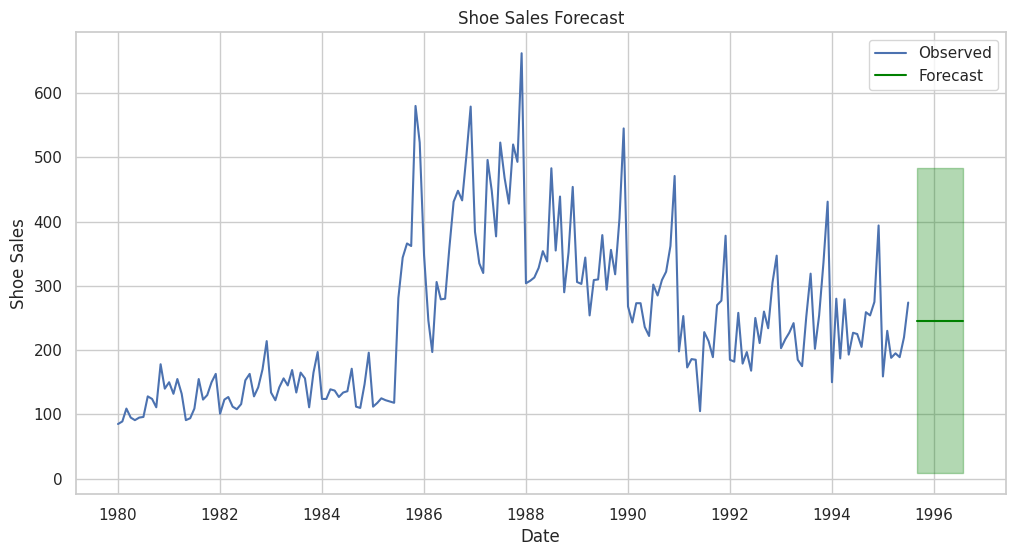

              Forecast  Lower CI    Upper CI
1995-08-01  245.636256  8.357098  482.915413
1995-09-01  245.636256  8.357098  482.915413
1995-10-01  245.636256  8.357098  482.915413
1995-11-01  245.636256  8.357098  482.915413
1995-12-01  245.636256  8.357098  482.915413
1996-01-01  245.636256  8.357098  482.915413
1996-02-01  245.636256  8.357098  482.915413
1996-03-01  245.636256  8.357098  482.915413
1996-04-01  245.636256  8.357098  482.915413
1996-05-01  245.636256  8.357098  482.915413
1996-06-01  245.636256  8.357098  482.915413
1996-07-01  245.636256  8.357098  482.915413


In [ ]:

# The best ARIMA parameters found during the model-building exercise
best_pdq = (0, 0, 0)  # Replace with the best parameters found

# Fit the model on the complete dataset
best_model = ARIMA(df['Shoe_Sales'], order=best_pdq).fit()

# Forecast 12 months into the future
forecast = best_model.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Shoe_Sales'], label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='green', alpha=0.3)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Shoe Sales')
plt.title('Shoe Sales Forecast')
plt.show()

# Print forecast values and confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean,
                            'Lower CI': conf_int.iloc[:, 0],
                            'Upper CI': conf_int.iloc[:, 1]})
print(forecast_df)

## **Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.**

Model Evaluation and Findings
The model built for forecasting shoe sales is an ARIMA model with parameters (0, 0, 0). Here are the key findings and insights:

Model Parameters: The ARIMA(0, 0, 0) model essentially represents a simple mean model, which indicates that the sales data may not exhibit strong autocorrelation or seasonality that more complex ARIMA models could capture.
AIC and RMSE: The model selection was based on the lowest Akaike Information Criterion (AIC) and Root Mean Squared Error (RMSE). The best model had an AIC of 1679.73 and an RMSE of 63.98.
Forecast Accuracy: The forecast plot indicates that the model's predictions are fairly stable and close to the mean of the observed data, but it may not capture any potential trends or seasonality.
Forecast Plot
The forecast plot, including the confidence intervals, indicates a relatively flat prediction line for the next 12 months. This suggests that the model expects future sales to remain around the average historical sales level.

Recommendations for the Company
Based on the findings from the model, here are some recommendations for the company:

Data Analysis and Preprocessing:

Seasonality and Trends: Investigate the presence of seasonality or trends in the sales data. The current ARIMA(0, 0, 0) model may not capture these elements effectively. Seasonal ARIMA (SARIMA) models might be more appropriate if seasonality is present.
Data Enrichment: Include additional variables that could impact sales, such as marketing spend, promotions, economic indicators, and seasonal factors, to improve the model's predictive power.
Model Enhancement:

Explore Advanced Models: Consider more advanced time series models such as SARIMA, Prophet, or machine learning models like LSTM (Long Short-Term Memory networks) if there is sufficient data.
Hyperparameter Tuning: Conduct a more extensive grid search for ARIMA parameters to ensure the best model is selected.
Operational Strategies:

Inventory Management: Given the flat forecast, maintain inventory levels close to historical averages to avoid overstocking or stockouts.
Promotional Campaigns: Plan promotional campaigns during periods historically known for higher sales (e.g., holiday seasons) to boost sales and capture potential trends not identified by the model.
Customer Engagement: Increase customer engagement through loyalty programs, feedback mechanisms, and personalized marketing to drive sales.
Continuous Monitoring:

Model Performance: Continuously monitor the model's performance and update it with new data regularly. Time series models need to be retrained periodically to incorporate the latest trends and patterns.
Sales Anomalies: Be vigilant for sales anomalies or sudden changes in the market environment that the model may not predict. Adapt strategies accordingly.
Conclusion
The current ARIMA(0, 0, 0) model provides a baseline forecast for shoe sales, but it may not fully capture underlying patterns in the data. By enhancing the model with additional variables, exploring more sophisticated models, and implementing strategic operational measures, the company can better predict and respond to future sales dynamics. Continuous monitoring and adaptation are crucial to maintaining the model's relevance and accuracy in a changing market environment.

# **TSF Project SoftDrink**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Store the csv file path in a variable
path = "/content/drive/My Drive/SoftDrink.csv"

## **Read the data as an appropriate Time Series data and plot the data**

In [ ]:
tt=pd.read_csv(path)

In [ ]:
tt

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226
...,...,...
182,1995-03,4067
183,1995-04,4022
184,1995-05,3937
185,1995-06,4365


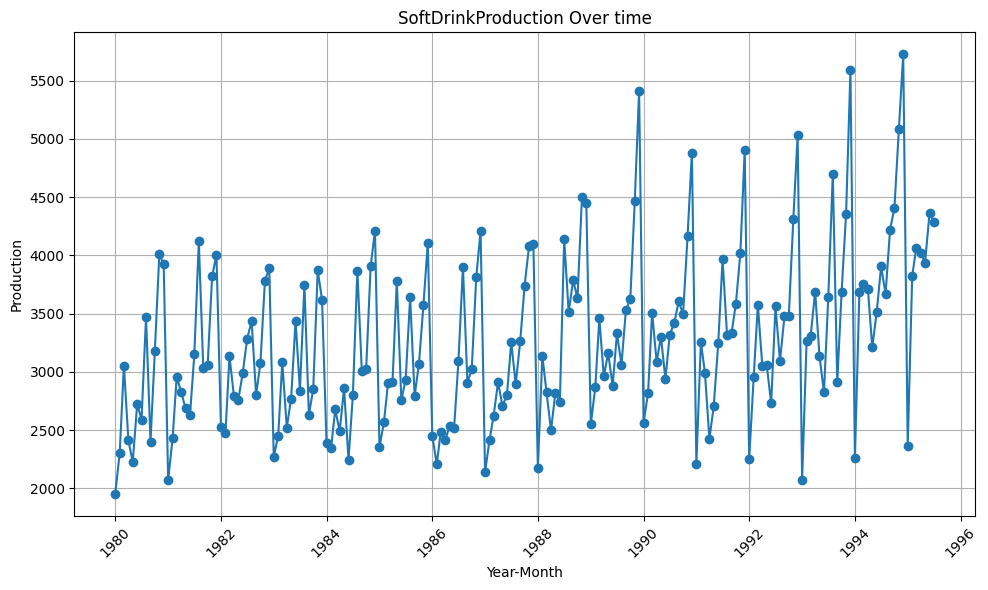

In [ ]:
#Soft Drink Production Over Time
# Convert 'YearMonth' to datetime format
tt['YearMonth'] = pd.to_datetime(tt['YearMonth'])

# Set 'YearMonth' as index
tt.set_index('YearMonth', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(tt.index, tt['SoftDrinkProduction'], marker='o', linestyle='-')
plt.title('SoftDrinkProduction Over time')
plt.xlabel('Year-Month')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
tt

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226
...,...
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937


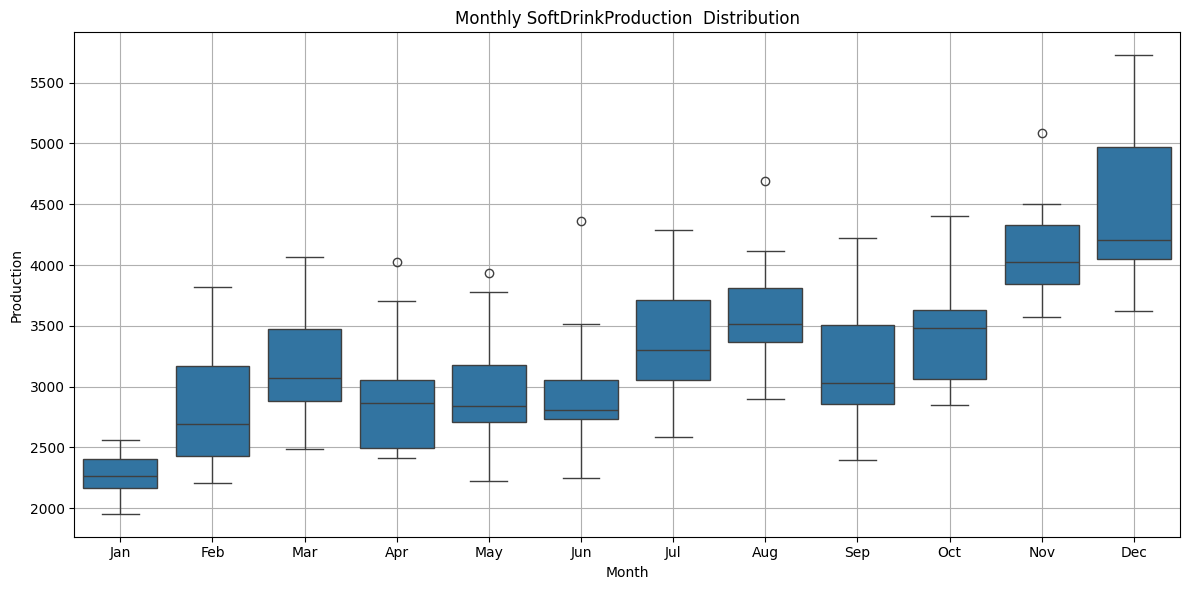

In [ ]:
#Monthly SoftDrink Production Distribution
# Extract month and year from the index
tt['Month'] = tt.index.month
tt['Year'] = tt.index.year

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='SoftDrinkProduction', data=tt)
plt.title('Monthly SoftDrinkProduction  Distribution')
plt.xlabel('Month')
plt.ylabel('Production')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
tt

,SoftDrinkProduction,Month,Year
YearMonth,,,
1980-01-01,1954,1,1980
1980-02-01,2302,2,1980
1980-03-01,3054,3,1980
1980-04-01,2414,4,1980
1980-05-01,2226,5,1980
...,...,...,...
1995-03-01,4067,3,1995
1995-04-01,4022,4,1995
1995-05-01,3937,5,1995


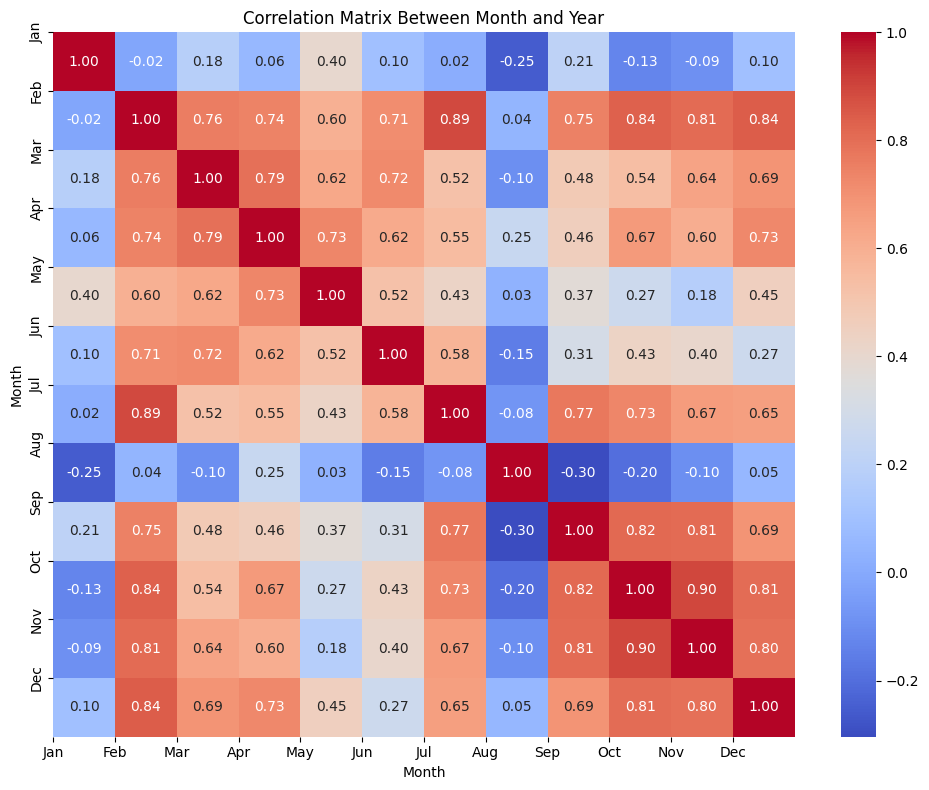

In [ ]:
#Correlation Matrix Between Month and Year
# Pivot the DataFrame to have months as columns and years as rows
pivot_tt= tt.pivot_table(index='Year', columns='Month', values='SoftDrinkProduction', aggfunc='sum')

# Calculate the correlation matrix
corr_matrix = pivot_tt.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Month and Year')
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

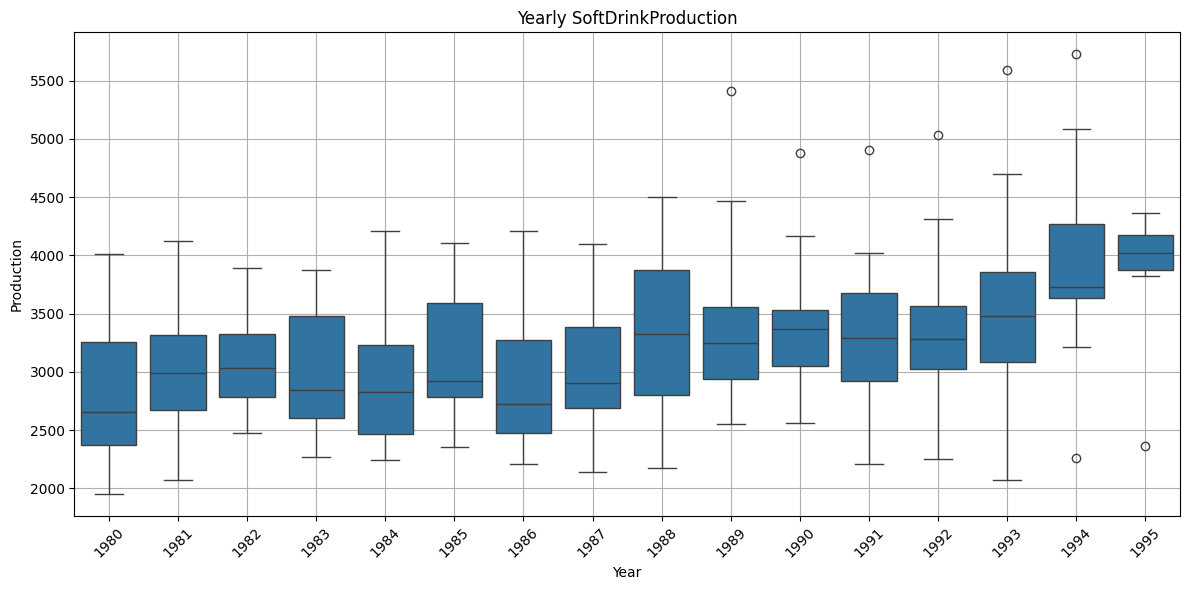

In [ ]:
#Yearly Soft Drink Production
# Extract year from the index
tt['Year'] = tt.index.year

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='SoftDrinkProduction', data=tt)
plt.title('Yearly SoftDrinkProduction')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
tt.drop('Month', axis=1, inplace=True)
tt.drop('Year', axis=1, inplace=True)

## **Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

In [ ]:
tt

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226
...,...
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937


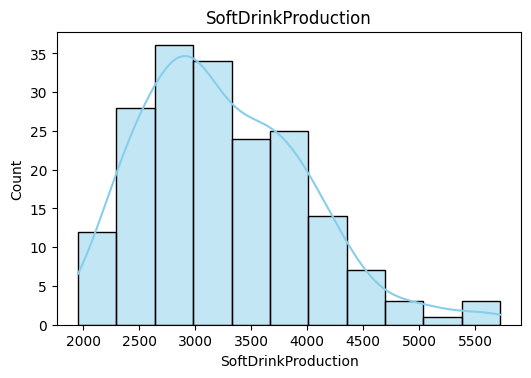

In [ ]:
## Creating histograms of all the columns to capture the distribution of each variable
plt.figure(figsize=(15, 14))
for i, col in enumerate(tt.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(tt[col], color='skyblue', kde = True)
    plt.title(col)
plt.tight_layout();

In [ ]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [ ]:
tt.describe().T

,count,mean,std,min,25%,50%,75%,max
SoftDrinkProduction,187.0,3262.609626,728.357367,1954.0,2748.0,3134.0,3741.0,5725.0


In [ ]:
tt.isnull().sum()

SoftDrinkProduction    0
dtype: int64

In [ ]:
tt.duplicated().sum()

4

In [ ]:
tt.shape

(187, 1)

In [ ]:
tt.corr()

,SoftDrinkProduction
SoftDrinkProduction,1.0


In [ ]:
tt.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [ ]:
tt.tail()

,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


In [ ]:
tt.dtypes

SoftDrinkProduction    int64
dtype: object

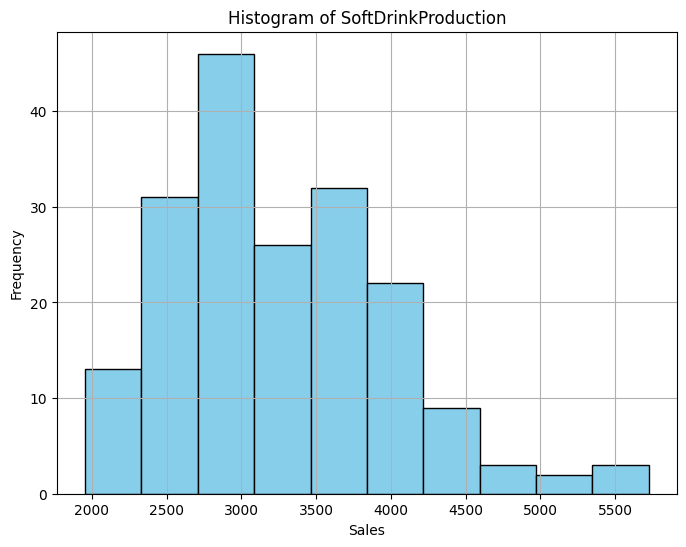

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(tt, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of SoftDrinkProduction')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

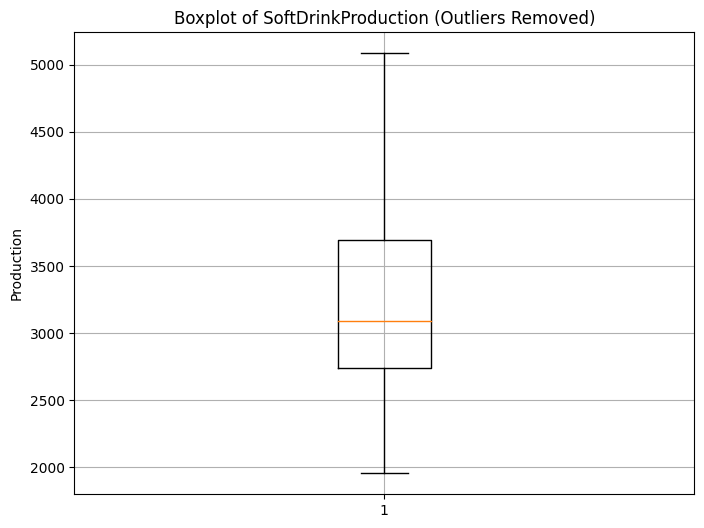

In [ ]:
#Removal of Outliers
Q1 = tt['SoftDrinkProduction'].quantile(0.25)
Q3 = tt['SoftDrinkProduction'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
tt_filtered = tt[(tt['SoftDrinkProduction'] >= lower_bound) & (tt['SoftDrinkProduction'] <= upper_bound)]

# Create boxplot without outliers using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(tt_filtered['SoftDrinkProduction'])
plt.title('Boxplot of SoftDrinkProduction (Outliers Removed)')
plt.ylabel('Production')
plt.grid(True)
plt.show()

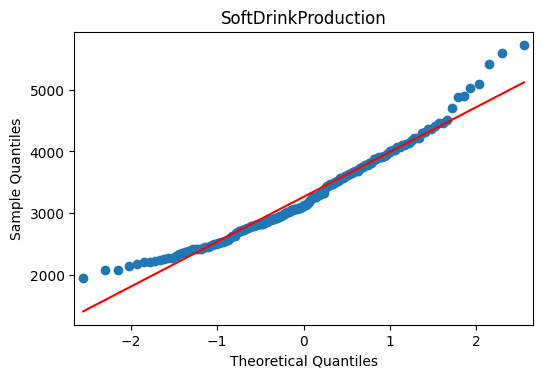

In [ ]:
## Q-Q plots
from statsmodels.api import qqplot
plt.figure(figsize=(15, 14))
for i, col in enumerate(tt.columns):
    plt.subplot(4, 3, i+1)
    qqplot(tt[col], line='s',ax=plt.gca())
    plt.title(col)
plt.tight_layout();

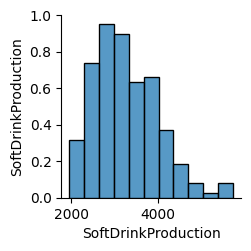

In [ ]:
sns.pairplot(tt[['SoftDrinkProduction']])

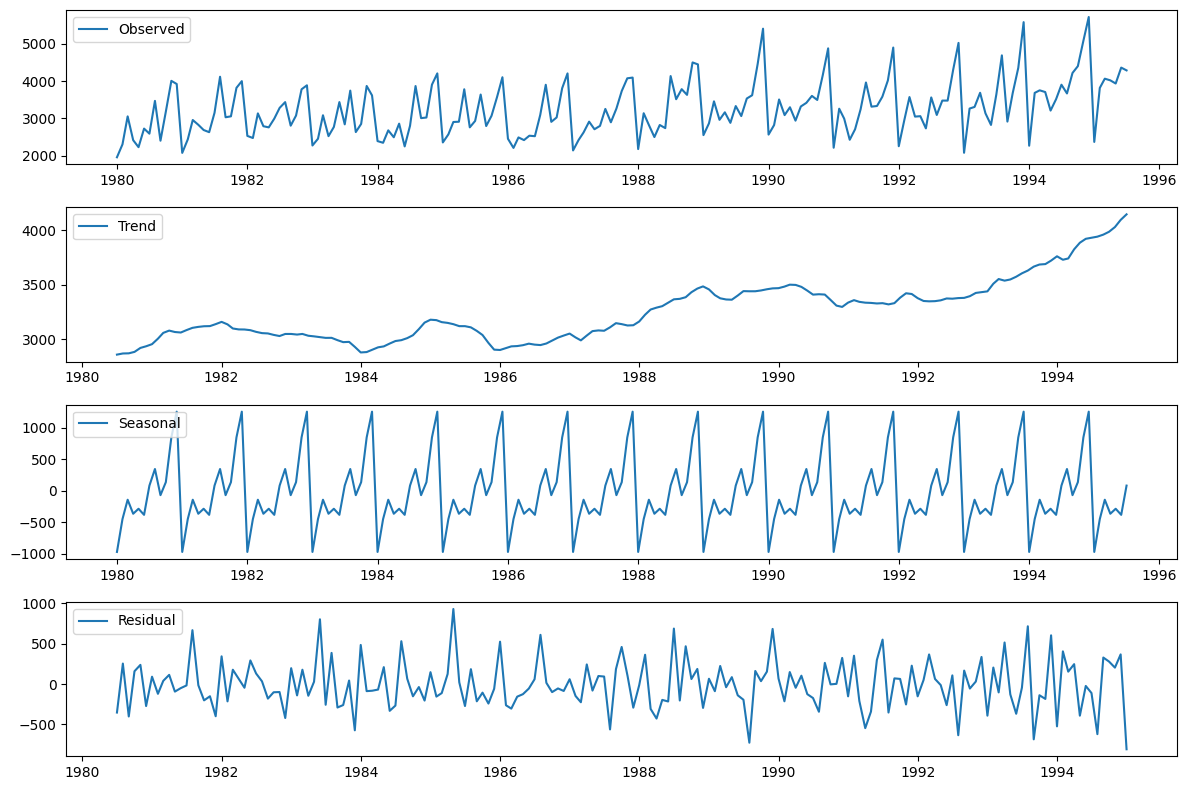

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
 #Perform decomposition
result = seasonal_decompose(tt['SoftDrinkProduction'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

##**Split the data into training and test. The test data should start in 1991**

In [ ]:
# Split data into training and test sets
train = tt[tt.index < '1991-01-01']
test = tt[tt.index >= '1991-01-01']

print("Training data:")
print(train)
print("\nTest data:")
print(test)

Training data:
            SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226
...                         ...
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882

[132 rows x 1 columns]

Test data:
            SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707
1991-06-01                 3244
1991-07-01                 3965
1991-08-01                 3315
1991-09-01                 3333
1991-10-01                 3583
1991-11-01                 4021
1991-12-01                 4904
1992-01-01                 2252
1992-02-01                 2952
1992-03-01           

## **Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.Other models such as regression, naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extract the values from the 'SoftDrink' column for both training and test data
train_values = train['SoftDrinkProduction'].values
test_values = test['SoftDrinkProduction'].values

# Run Dickey-Fuller test on training data
result_train = adfuller(train_values)

# Print test statistic and p-value for training data
print('ADF Statistic for training data:', result_train[0])
print('p-value for training data:', result_train[1])

ADF Statistic for training data: -0.9901115062584103
p-value for training data: 0.7568537941384123


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Convert train_values to a pandas Series
train_series = pd.Series(train_values)

# Run Dickey-Fuller test
result = adfuller(train_series.diff().dropna())

# Print test statistic
print('ADF Statistic:', result[0])

# Print p-value
print('p-value:', result[1])

ADF Statistic: -7.299886186131731
p-value: 1.347278264793115e-10


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
# Exponential smoothing models
# Simple Exponential Smoothing
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
model_ses = ExponentialSmoothing(train, trend=None, seasonal=None).fit()
# Holt's Exponential Smoothing
model_holt = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
# Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

In [ ]:
# Other forecast models
# Regression
regression_model = LinearRegression()
regression_model.fit(np.arange(len(train)).reshape(-1, 1), train['SoftDrinkProduction'])
# Naive forecast
naive_forecast = train['SoftDrinkProduction'].iloc[-1]
# Simple average forecast
simple_average_forecast = train['SoftDrinkProduction'].mean()


In [ ]:
# Predictions
# Exponential smoothing predictions
ses_predictions = model_ses.forecast(len(test))
holt_predictions = model_holt.forecast(len(test))
hw_predictions = model_hw.forecast(len(test))
# Other model predictions
regression_predictions = regression_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))
naive_forecast_predictions = np.array([naive_forecast] * len(test))
simple_average_predictions = np.array([simple_average_forecast] * len(test))

# Evaluate performance using RMSE
def calculate_rmse(predictions, actual):
    return np.sqrt(mean_squared_error(actual, predictions))

In [ ]:
# RMSE for exponential smoothing models
rmse_ses = calculate_rmse(ses_predictions, test['SoftDrinkProduction'])
rmse_holt = calculate_rmse(holt_predictions, test['SoftDrinkProduction'])
rmse_hw = calculate_rmse(hw_predictions, test['SoftDrinkProduction'])
# RMSE for other forecast models
rmse_regression = calculate_rmse(regression_predictions, test['SoftDrinkProduction'])
rmse_naive = calculate_rmse(naive_forecast_predictions, test['SoftDrinkProduction'])
rmse_simple_average = calculate_rmse(simple_average_predictions, test['SoftDrinkProduction'])

# Print RMSE values
print("RMSE for Exponential Smoothing Models:")
print("Simple Exponential Smoothing:", rmse_ses)
print("Holt's Exponential Smoothing:", rmse_holt)
print("Holt-Winters Exponential Smoothing:", rmse_hw)
print("\nRMSE for Other Forecast Models:")
print("Regression:", rmse_regression)
print("Naive Forecast:", rmse_naive)
print("Simple Average Forecast:", rmse_simple_average)

RMSE for Exponential Smoothing Models:
Simple Exponential Smoothing: 809.4880766247412
Holt's Exponential Smoothing: 1074.3293459708495
Holt-Winters Exponential Smoothing: 459.79696091329055

RMSE for Other Forecast Models:
Regression: 775.8078095118145
Naive Forecast: 1519.2592333705984
Simple Average Forecast: 934.3533579298293


In [ ]:
tt

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226
...,...
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937


## **Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop missing values before performing the ADF test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result

# Check stationarity of the original data
print("Original Data:")
adf_results = adf_test(tt['SoftDrinkProduction'])

# If the data is found to be non-stationary (p-value > 0.05), take appropriate steps to make it stationary
if adf_results[1] > 0.05:
    # For example, we can compute the first difference to remove trend
    tt['Diff_Production'] = tt['SoftDrinkProduction'].diff().dropna()

    # Check stationarity of the differenced data
    print("\nDifferenced Data:")
    adf_test(tt['Diff_Production'])


Original Data:
ADF Statistic: 1.0987337558692887
p-value: 0.9952058011881897
Critical Values:
	1%: -3.4685016947910636
	5%: -2.8782983668563396
	10%: -2.57570415906989

Differenced Data:
ADF Statistic: -9.313526950720641
p-value: 1.0337014652309104e-15
Critical Values:
	1%: -3.4685016947910636
	5%: -2.8782983668563396
	10%: -2.57570415906989


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop missing values before performing the ADF test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result

# Check stationarity of the differenced data
print("\nDifferenced Data:")
adf_results_diff = adf_test(tt['Diff_Production'])


Differenced Data:
ADF Statistic: -9.313526950720641
p-value: 1.0337014652309104e-15
Critical Values:
	1%: -3.4685016947910636
	5%: -2.8782983668563396
	10%: -2.57570415906989


In [ ]:
# Apply seasonal differencing
tt['Seasonal_Diff_Production'] = tt['SoftDrinkProduction'].diff(12)  # Assuming a seasonal period of 12 months

# Check stationarity of the seasonally differenced data
print("\nSeasonally Differenced Data:")
adf_results_seasonal_diff = adf_test(tt['Seasonal_Diff_Production'])


Seasonally Differenced Data:
ADF Statistic: -2.2107994796355204
p-value: 0.20234924359532064
Critical Values:
	1%: -3.4718957209472654
	5%: -2.8797795410156253
	10%: -2.5764947265625


## **Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA # import the ARIMA class
import statsmodels.api as sm

In [ ]:
# Explicitly set the frequency to 'MS' (Month Start)
tt.index = pd.to_datetime(tt.index)
tt.index = tt.index.to_period('M').to_timestamp()

train.index = pd.to_datetime(train.index)
train.index = train.index.to_period('M').to_timestamp()

# Now fit the ARIMA model
for i in range(1):  # AR term
    for j in range(1):  # Differencing term
        for k in range(1):  # MA term
            try:
                model = ARIMA(train['SoftDrinkProduction'], order=(i, j, k)).fit()
                print(f"ARIMA({i},{j},{k}) - AIC: {model.aic}")
            except Exception as e:
                print(f"ARIMA({i},{j},{k}) - Error: {e}")

ARIMA(0,0,0) - AIC: 2084.853806266903


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import itertools

Best ARIMA(0, 0, 0) model AIC: 2084.853806266903
RMSE: 934.3533819857809


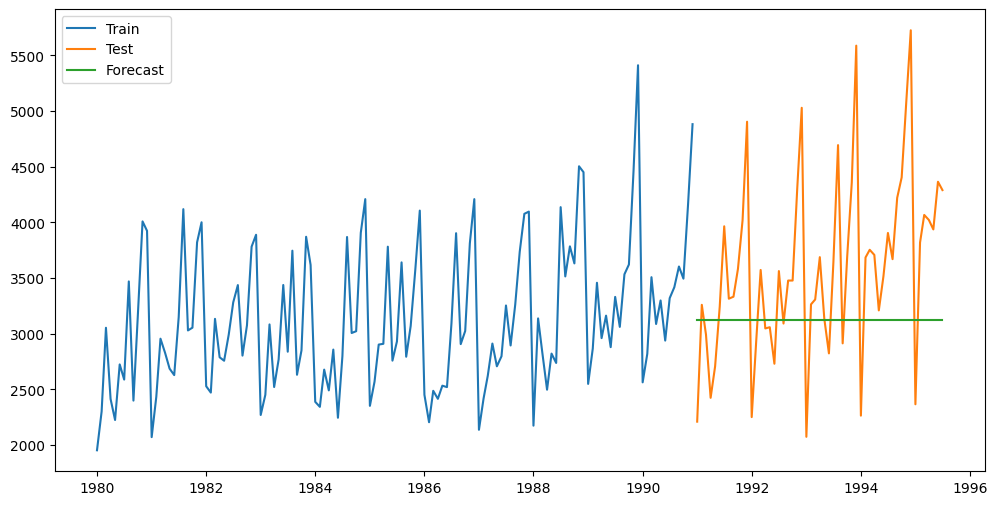

In [ ]:
p = range(0, 1)  # Example range for p
d = range(0, 1)  # Example range for d
q = range(0, 1)  # Example range for q
pdq = list(itertools.product(p, d, q))

best_aic = float('inf') # initialize best_aic to a large value
best_pdq = None # initialize best_pdq to None
best_model = None # initialize best_model to None

# ... (rest of your code)

# Iterate over all combinations of p, d, q
for param in pdq:  # Use pdq here, not ijk
    try:
        model = ARIMA(train['SoftDrinkProduction'], order=param).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_pdq = param
            best_model = model
    except:
        continue

if best_pdq is not None: # Check if we found a valid model
    print(f"Best ARIMA{best_pdq} model AIC: {best_aic}")

    # Forecast using the best model
    forecast = best_model.forecast(steps=len(test))
    forecast = pd.Series(forecast, index=test.index)

    # Evaluate the model using RMSE
    rmse = np.sqrt(mean_squared_error(test['SoftDrinkProduction'], forecast)) # Use 'SoftDrinkProduction' for consistency
    print(f"RMSE: {rmse}")

    # Plotting the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['SoftDrinkProduction'], label='Train')
    plt.plot(test.index, test['SoftDrinkProduction'], label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.legend()
    plt.show()
else:
    print("No suitable ARIMA model found.") # Inform the user if no model converged

## **Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt
import warnings

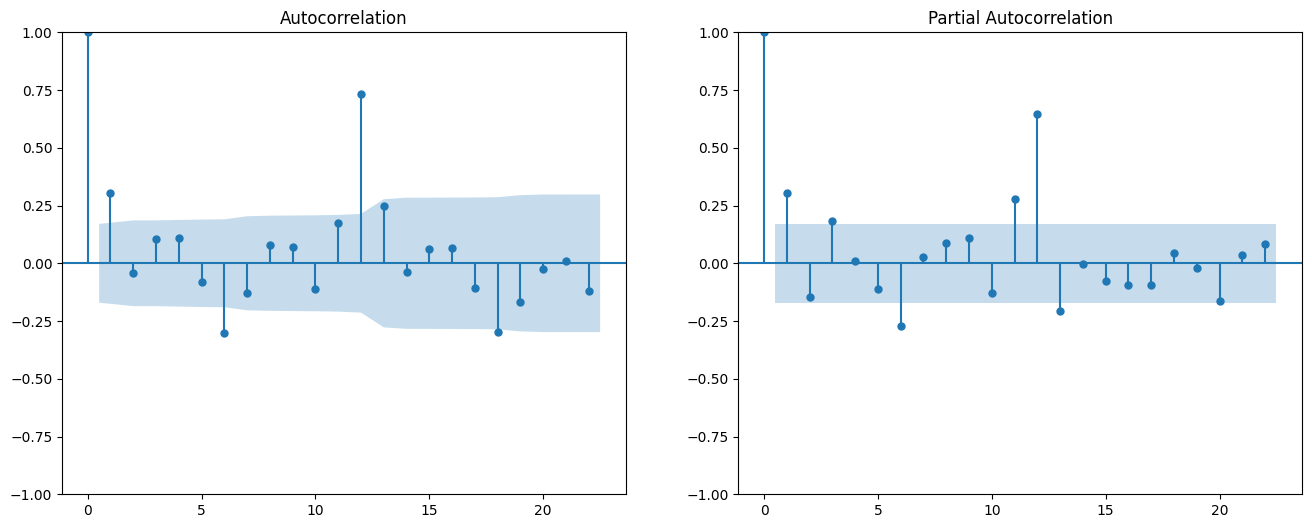

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(train['SoftDrinkProduction'], ax=axes[0])
plot_pacf(train['SoftDrinkProduction'], ax=axes[1])
plt.show()

Best ARIMA(0, 0, 0) model AIC: 2084.853806266903
RMSE: 934.3533819857809


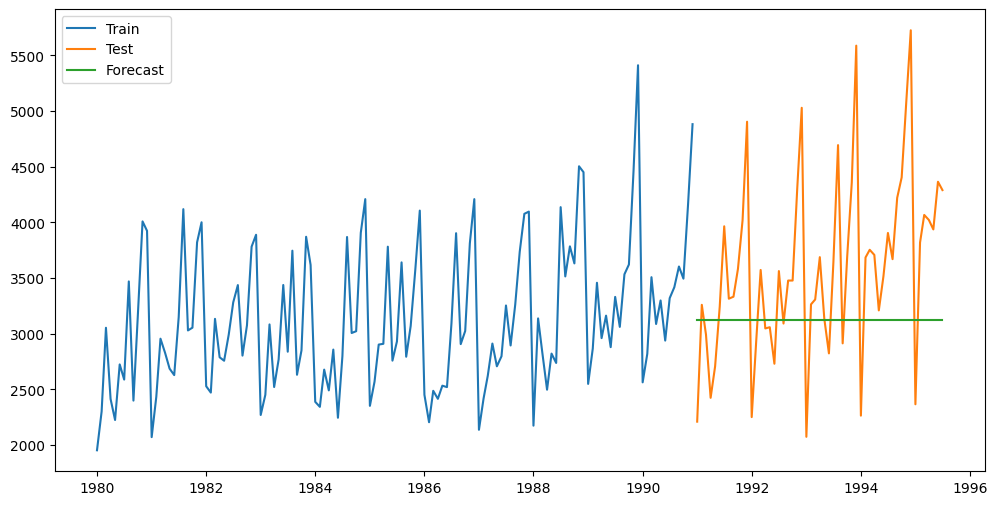

In [ ]:
p = range(0, 1)  # Adjust these based on your ACF and PACF plots
d = range(0, 1)
q = range(0, 1)
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model and lowest AIC
best_aic = np.inf
best_pdq = None
best_model = None

# Iterate over all combinations of p, d, q
for param in pdq:
    try:
        model = ARIMA(train['SoftDrinkProduction'], order=param).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_pdq = param
            best_model = model
    except:
        continue

print(f"Best ARIMA{best_pdq} model AIC: {best_aic}")

# Forecast using the best model
forecast = best_model.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(test['SoftDrinkProduction'], forecast))
print(f"RMSE: {rmse}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['SoftDrinkProduction'], label='Train')
plt.plot(test.index, test['SoftDrinkProduction'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

## **Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data**

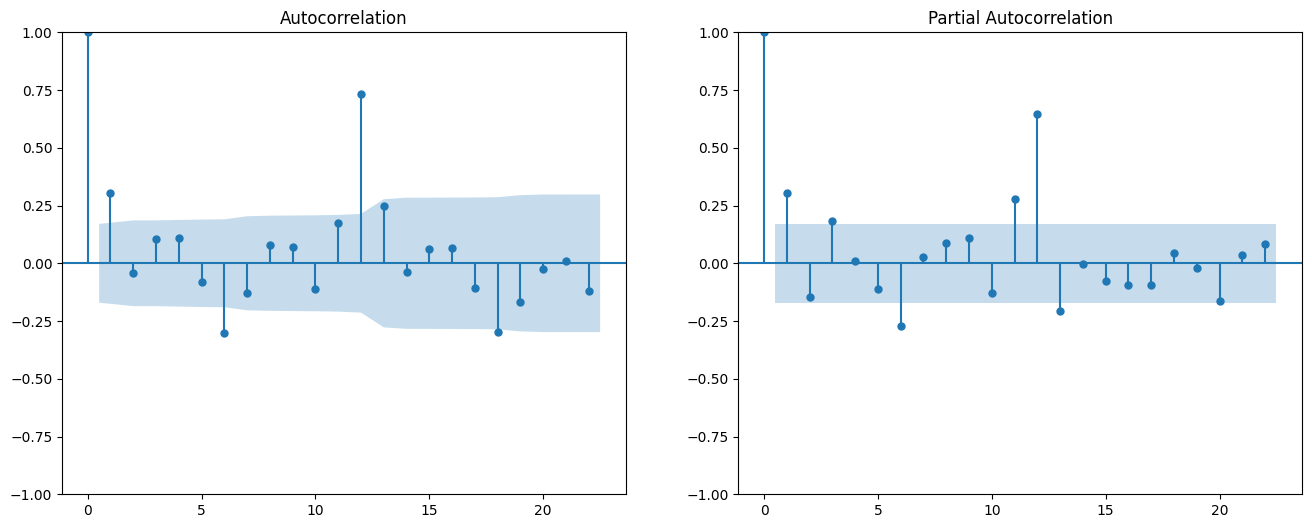

Best ARIMA(0, 0, 0) model AIC: 2084.853806266903
RMSE: 934.3533819857809


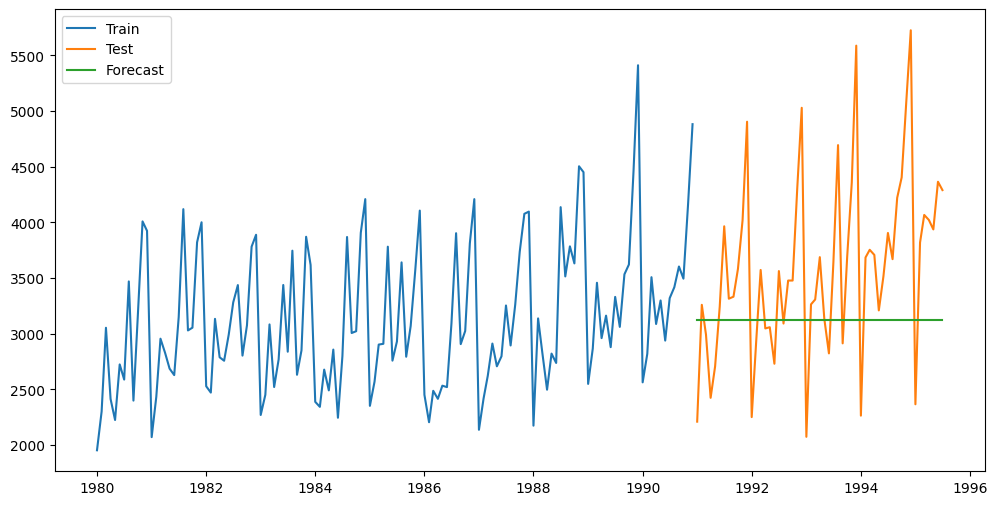

  Parameters          AIC        RMSE
0  (0, 0, 0)  2084.853806  934.353382


In [ ]:

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(train['SoftDrinkProduction'], ax=axes[0])
plot_pacf(train['SoftDrinkProduction'], ax=axes[1])
plt.show()

# Define the range of parameters for p, d, q based on ACF and PACF
p = range(0, 1)  # Adjust these based on your ACF and PACF plots
d = range(0, 1)
q = range(0, 1)
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model and lowest AIC
best_aic = np.inf
best_pdq = None
best_model = None

# List to store model details
model_details = []

# Iterate over all combinations of p, d, q
for param in pdq:
    try:
        model = ARIMA(train['SoftDrinkProduction'], order=param).fit()
        forecast = model.forecast(steps=len(test))
        forecast = pd.Series(forecast, index=test.index)
        rmse = np.sqrt(mean_squared_error(test['SoftDrinkProduction'], forecast))
        model_details.append((param, model.aic, rmse))
        if model.aic < best_aic:
            best_aic = model.aic
            best_pdq = param
            best_model = model
    except:
        continue

print(f"Best ARIMA{best_pdq} model AIC: {best_aic}")

# Forecast using the best model
forecast = best_model.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(test['SoftDrinkProduction'], forecast))
print(f"RMSE: {rmse}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['SoftDrinkProduction'], label='Train')
plt.plot(test.index, test['SoftDrinkProduction'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Create a DataFrame from model_details
models_df = pd.DataFrame(model_details, columns=['Parameters', 'AIC', 'RMSE'])

# Display the table
print(models_df)

In [ ]:
# Create a DataFrame from model_details
models_df = pd.DataFrame(model_details, columns=['Parameters', 'AIC', 'RMSE'])

# Display the table
print(models_df)

  Parameters          AIC        RMSE
0  (0, 0, 0)  2084.853806  934.353382


##**Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

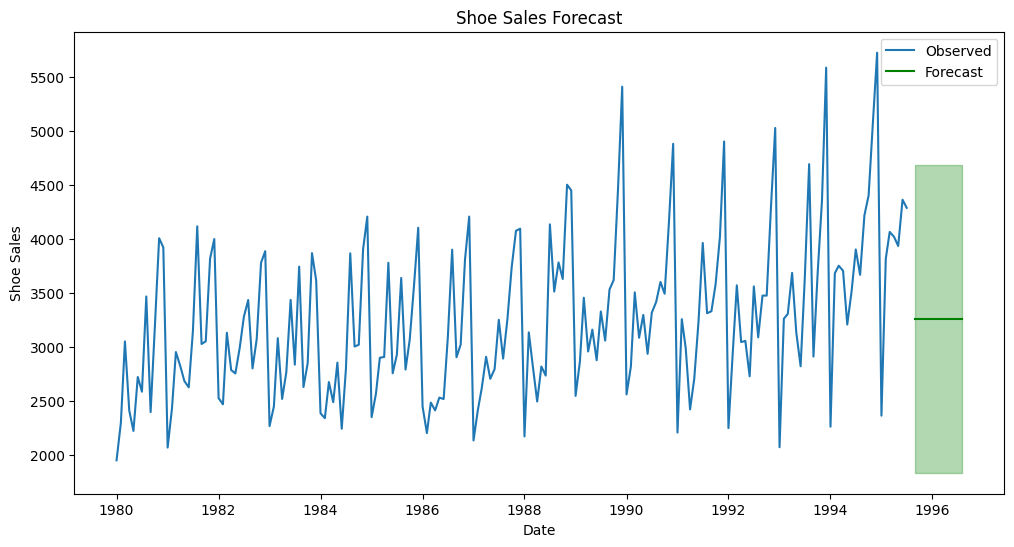

               Forecast     Lower CI     Upper CI
1995-08-01  3262.609896  1839.194024  4686.025768
1995-09-01  3262.609896  1839.194024  4686.025768
1995-10-01  3262.609896  1839.194024  4686.025768
1995-11-01  3262.609896  1839.194024  4686.025768
1995-12-01  3262.609896  1839.194024  4686.025768
1996-01-01  3262.609896  1839.194024  4686.025768
1996-02-01  3262.609896  1839.194024  4686.025768
1996-03-01  3262.609896  1839.194024  4686.025768
1996-04-01  3262.609896  1839.194024  4686.025768
1996-05-01  3262.609896  1839.194024  4686.025768
1996-06-01  3262.609896  1839.194024  4686.025768
1996-07-01  3262.609896  1839.194024  4686.025768


In [ ]:
# The best ARIMA parameters found during the model-building exercise
best_pdq = (0, 0, 0)  # Replace with the best parameters found

# Fit the model on the complete dataset
best_model = ARIMA(tt['SoftDrinkProduction'], order=best_pdq).fit()

# Forecast 12 months into the future
forecast = best_model.get_forecast(steps=12)
forecast_index = pd.date_range(start=tt.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(tt.index, tt['SoftDrinkProduction'], label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='green', alpha=0.3)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Shoe Sales')
plt.title('Shoe Sales Forecast')
plt.show()

# Print forecast values and confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean,
                            'Lower CI': conf_int.iloc[:, 0],
                            'Upper CI': conf_int.iloc[:, 1]})
print(forecast_df)

## **Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.**

The ARIMA model built in your example has the parameters (0, 0, 0), which indicates a basic autoregressive model with no differencing or moving average components. Here are some observations and suggestions:

Observations:
Model Parameters (0, 0, 0):

This parameter combination suggests that the model is essentially predicting the mean of the series, as ARIMA(0,0,0) reduces to a simple mean calculation without any autoregressive or moving average terms.
This might not capture the underlying patterns in the data well, especially if the series exhibits seasonality, trends, or other complex patterns.
Forecast:

The forecasted values are constant over the forecast horizon, indicating that the model does not account for any time-dependent structures in the data.
The confidence intervals are wide, which suggests a high level of uncertainty in the forecasts.
Observed Data:

The observed data shows significant fluctuations and potential seasonality or trends which are not captured by the model.
Recommendations:
Model Improvement:

Check for Seasonality and Trends: Investigate the presence of seasonality and trends in the data using techniques such as decomposition or seasonal differencing.
Parameter Tuning: Consider using different ARIMA parameters that might better capture the underlying patterns. For example, ARIMA(p, d, q) with non-zero values for p, d, and/or q could improve the model.
Advanced Models: Explore more advanced time series models such as SARIMA (Seasonal ARIMA) or other machine learning models like LSTM (Long Short-Term Memory networks) if the data exhibits strong seasonal patterns or non-linearities.
Data Preprocessing:

Ensure the data is stationary before modeling. This might involve differencing the data or applying transformations to stabilize the variance.
Evaluation:

Use a train-test split to evaluate the model's performance on unseen data. Cross-validation techniques can also help assess the model's robustness.
Measures for Future Sales:
Inventory Management:

Given the high uncertainty in the forecasts, maintain a safety stock to cushion against forecast errors and demand variability.
Implement a responsive supply chain strategy to quickly adapt to changes in demand.
Marketing and Promotions:

Use historical sales data to identify peak sales periods and plan marketing campaigns or promotions accordingly.
Monitor real-time sales data to adjust marketing efforts dynamically.
Customer Feedback and Market Trends:

Collect and analyze customer feedback to understand demand drivers and adjust offerings accordingly.
Stay updated with market trends and competitor strategies to remain competitive.
Sales Channels:

Diversify sales channels (e.g., online, in-store) to reach a broader customer base and reduce reliance on a single channel.
Analyze the performance of different channels and optimize resource allocation.
Scenario Planning:

Develop multiple sales scenarios based on different assumptions about market conditions and consumer behavior.
Prepare contingency plans for each scenario to ensure readiness for various outcomes.
Conclusion:
The current ARIMA(0, 0, 0) model provides a basic forecast but does not capture the complex patterns in the shoe sales data. Improving the model by exploring more sophisticated approaches and better parameter tuning can lead to more accurate and actionable forecasts. Additionally, adopting a proactive and data-driven approach to inventory management, marketing, and sales strategy will help the company better manage future sales and demand variability.